In [15]:
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!

In [16]:
from util.functions import area_latlon
from util.functions import create_masks
from util.functions import split_masks
from util.gamap_colormap import WhGrYlRd

# Create masks

In [17]:
# load data
fname = '/geos/u73/msadiq/GEOS-Chem/HEMCO/CO2/v2019-12/EDGAR_monthly_2018_1x1.nc'
ds = xr.open_dataset(fname)
# read in one month of data, [180,360], to create corresponding mask
dr = ds['emi_co2'][0,:,:]
dr

<xarray.DataArray 'emi_co2' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     datetime64[ns] 2014-01-01
Attributes:
    long_name:  EDGAR fossil fuel CO2 from Mehliyar Sadiq
    units:      kg/m2/s

In [18]:
# available mask types
mask_types = ['giorgi', 'srex'] 
#'countries_110', 'countries_50', 
#'us_states_50', 'us_states_10']

In [19]:
# mass produce masks for all mask_types and all regions
for mask_type in mask_types:
# create masks for input file
    mask = create_masks(input_file=dr, 
                    input_file_type='dataarray', 
                    var_name='', 
                    mask_type=mask_type, 
                    output_format='xarray', 
                    output_path='/geos/u73/msadiq/GEOS-Chem/MASKS/nc/' + mask_type, 
                    figure_flag = False, 
                    figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/' + mask_type)
# Split it into separate mask files and save   
    split_masks(input_file = mask, 
            input_file_type='dataarray',
            output_format='netcdf', 
            output_path='/geos/u73/msadiq/GEOS-Chem/MASKS/nc/' + mask_type, 
            figure_flag = False, 
            figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/' + mask_type)

finished creating masks for giorgi
finished spliting masks
finished creating masks for srex
finished spliting masks


In [20]:
# one mask_type for demo
mask_type='giorgi'
mask = create_masks(input_file=dr, 
                    input_file_type='dataarray', 
                    var_name='', 
                    mask_type='giorgi', 
                    output_format='netcdf', 
                    output_path='/geos/u73/msadiq/GEOS-Chem/MASKS/nc/' + mask_type, 
                    figure_flag = False, 
                    figure_path='/home/msadiq/Desktop/co2/data/emission/MASKS/figures/' + mask_type)

finished creating masks for giorgi


AttributeError: 'NoneType' object has no attribute 'min'

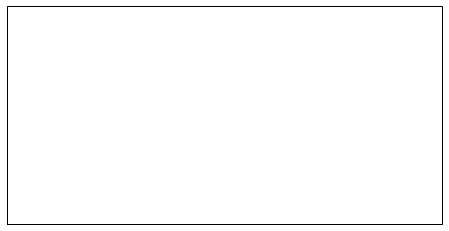

In [21]:
# global map
fig = plt.figure(figsize=[8, 4])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)

low = mask.min()
high = mask.max()
levels = np.arange(low - 0.5, high + 1)

mask.plot(ax=ax, transform=ccrs.PlateCarree(), levels=levels, cmap='tab20', vmax = 21.5, cbar_kwargs={'shrink': 0.8,})
ax.set_title(' ' + str(int(high.values)) + " masks ")
ax.coastlines();

### Split it into separate mask files and save

In [ ]:
split_masks(input_file = mask, 
            input_file_type='dataarray',
            output_format='netcdf', 
            output_path='~/Desktop/co2/data/emission/MASKS/nc/giorgi', 
            figure_flag = False, 
            figure_path='~/Desktop/co2/data/emission/MASKS/figures/giorgi')